<a href="https://colab.research.google.com/github/baekka1/Crop-Yield-Prediction/blob/main/GrowthPhaseVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload file
pr_df = pd.read_csv('pr_avg_growing_phase.csv')
rmax_df = pd.read_csv('rmax_avg_growing_phase.csv')
rmin_df = pd.read_csv('rmin_avg_growing_phase.csv')
srad_df = pd.read_csv('srad_avg_growing_phase.csv')
sph_df = pd.read_csv('sph_avg_growing_phase.csv')
th_df = pd.read_csv('th_avg_growing_phase.csv')
tmmn_df = pd.read_csv('tmmn_avg_growing_phase.csv')
tmmx_df = pd.read_csv('tmmx_avg_growing_phase.csv')
th_df = pd.read_csv('th_avg_growing_phase.csv')
vpd_df = pd.read_csv('vpd_avg_growing_phase.csv')
vs_df = pd.read_csv('vs_avg_growing_phase.csv')
features = ['sph', 'th', 'tmmn', 'tmmx', 'th', 'vpd', 'vs']



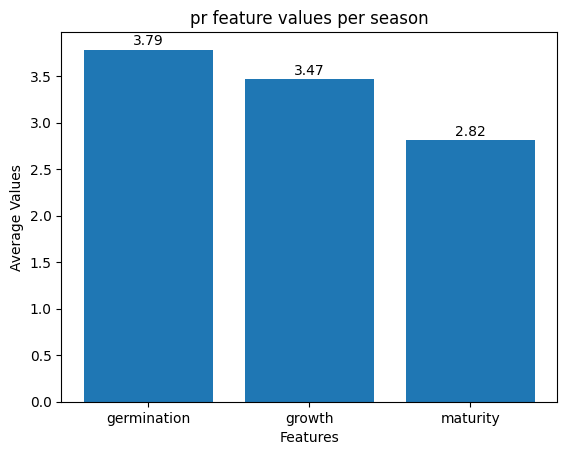

In [42]:
pr_germination = np.mean(pr_df['germination'])
pr_growth = np.mean(pr_df['growth'])
pr_maturity = np.mean(pr_df['maturity'])
feature_values_pr = [pr_germination, pr_growth, pr_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_pr)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('pr feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()


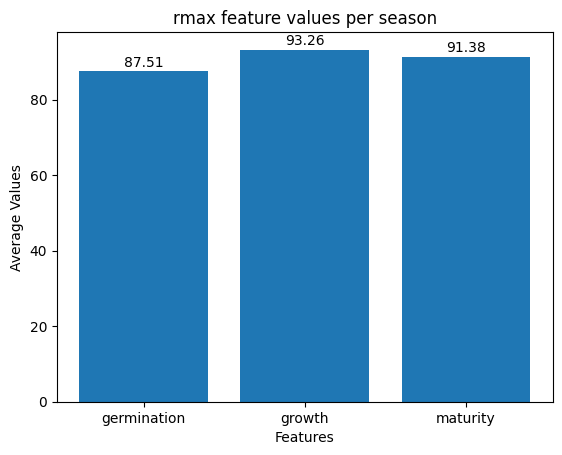

In [53]:
rmax_germination = np.mean(rmax_df['germination'])
rmax_growth = np.mean(rmax_df['growth'])
rmax_maturity = np.mean(rmax_df['maturity'])
feature_values_rmax = [rmax_germination,rmax_growth,rmax_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_rmax)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('rmax feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()

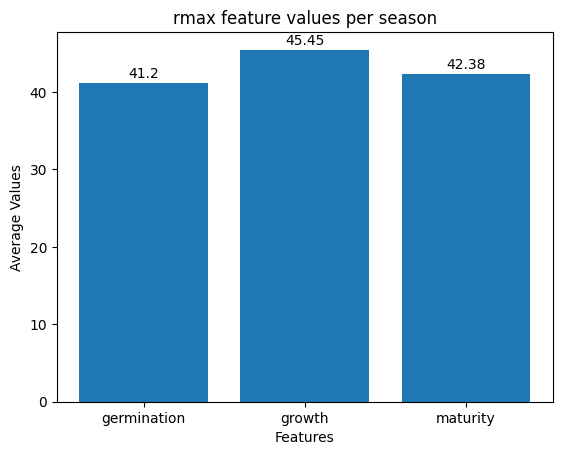

In [54]:
rmin_germination = np.mean(rmin_df['germination'])
rmin_growth = np.mean(rmin_df['growth'])
rmin_maturity = np.mean(rmin_df['maturity'])
feature_values_rmin = [rmin_germination,rmin_growth,rmin_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_rmin)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('rmax feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()


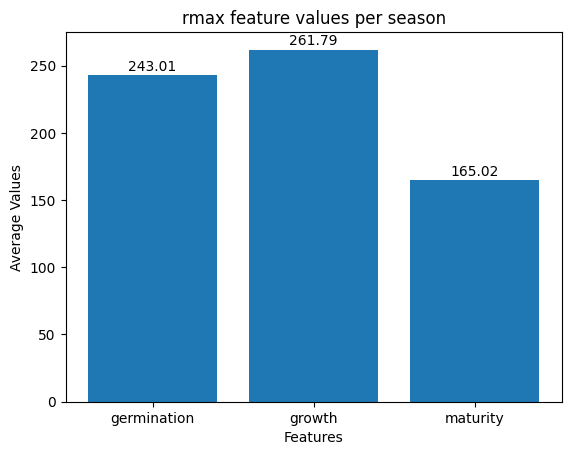

In [55]:
srad_germination = np.mean(srad_df['germination'])
srad_growth = np.mean(srad_df['growth'])
srad_maturity = np.mean(srad_df['maturity'])
feature_values_srad = [srad_germination,srad_growth,srad_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_srad)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('rmax feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()

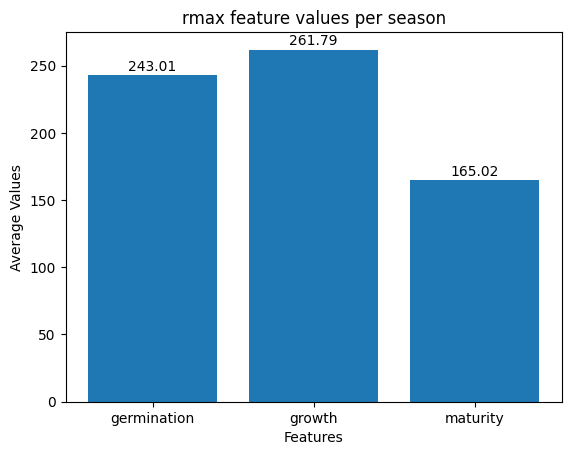

In [56]:
srad_germination = np.mean(srad_df['germination'])
srad_growth = np.mean(srad_df['growth'])
srad_maturity = np.mean(srad_df['maturity'])
feature_values_srad = [srad_germination,srad_growth,srad_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_srad)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('rmax feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()

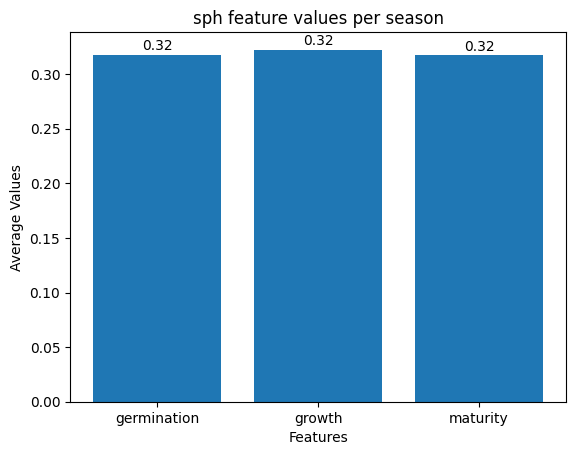

In [47]:
# sph
sph_germination = np.mean(sph_df['germination'])
sph_growth = np.mean(sph_df['growth'])
sph_maturity = np.mean(sph_df['maturity'])
feature_values_sph = [sph_germination, sph_growth, sph_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_sph)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('sph feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()





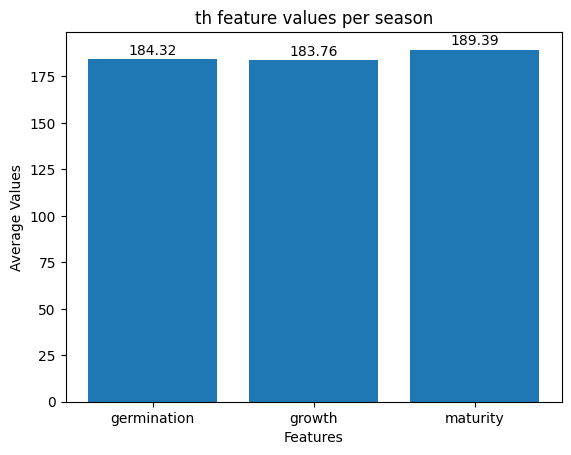

In [48]:
# th
th_germination = np.mean(th_df['germination'])
th_growth = np.mean(th_df['growth'])
th_maturity = np.mean(th_df['maturity'])
feature_values_th = [th_germination, th_growth, th_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_th)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('th feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()




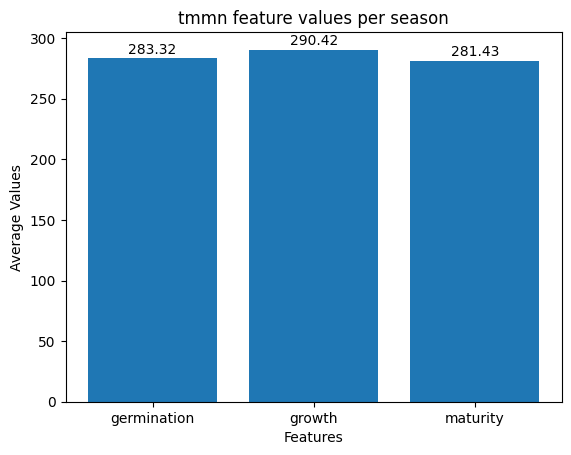

In [49]:
# tmmn
tmmn_germination = np.mean(tmmn_df['germination'])
tmmn_growth = np.mean(tmmn_df['growth'])
tmmn_maturity = np.mean(tmmn_df['maturity'])
feature_values_tmmn = [tmmn_germination, tmmn_growth, tmmn_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_tmmn)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('tmmn feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()




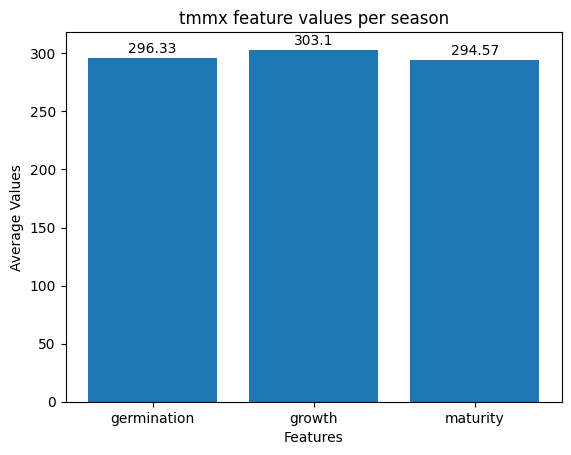

In [50]:
# tmmx
tmmx_germination = np.mean(tmmx_df['germination'])
tmmx_growth = np.mean(tmmx_df['growth'])
tmmx_maturity = np.mean(tmmx_df['maturity'])
feature_values_tmmx = [tmmx_germination, tmmx_growth, tmmx_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_tmmx)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('tmmx feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()




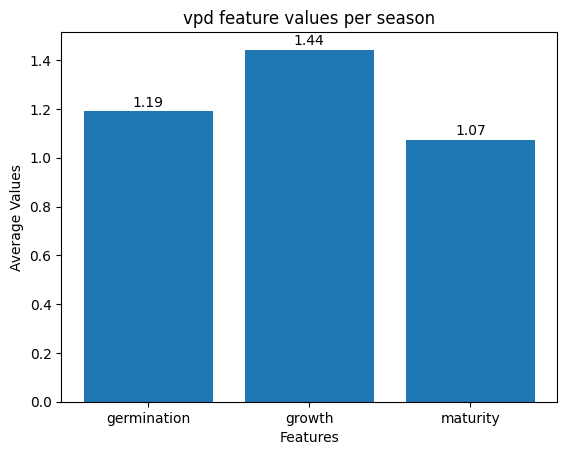

In [51]:
# vpd
vpd_germination = np.mean(vpd_df['germination'])
vpd_growth = np.mean(vpd_df['growth'])
vpd_maturity = np.mean(vpd_df['maturity'])
feature_values_vpd = [vpd_germination, vpd_growth, vpd_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_vpd)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('vpd feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()




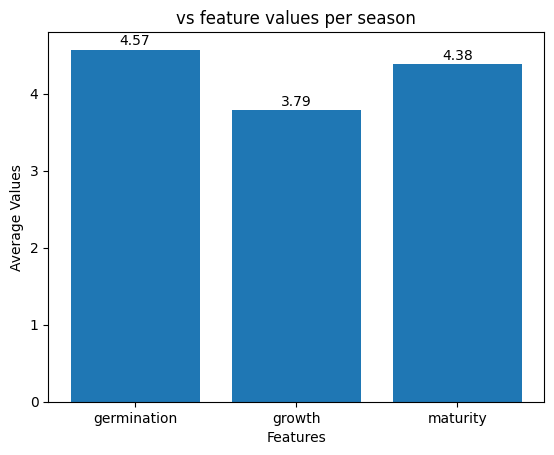

In [52]:
# vs
vs_germination = np.mean(vs_df['germination'])
vs_growth = np.mean(vs_df['growth'])
vs_maturity = np.mean(vs_df['maturity'])
feature_values_vs = [vs_germination, vs_growth, vs_maturity]
feature_names = ['germination', 'growth', 'maturity']
bars = plt.bar(feature_names, feature_values_vs)
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('vs feature values per season')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom')
plt.show()